In [5]:
from gp import *
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 50
plt.rcParams['ytick.labelsize'] = 50
plt.rcParams['legend.fontsize'] = 20

In [6]:
input_file = '../training_results/1D_500/train_inputs.json'
var_file = '../training_results/1D_500/train_outputs_var.json'
output_file = '../training_results/1D_500/train_outputs_mean.json'
input_type = 'I'
fname = '../GP_results/1D_500_GP.pickle'
new_run = True
I_srs_plot = True

In [7]:
X_star = np.geomspace(0.9e14, 1.1e16, 500)[:,None]

In [8]:
try:
    GP_data_dict = read_pickle_file(fname)
except:
    new_run = True

if new_run:
    GP_data_dict = GP_1D_predict_all(X_star = X_star,\
                                    input_file = input_file,\
                                    input_type = input_type,\
                                    output_file = output_file,\
                                    var_file = var_file,\
                                    fname = fname,\
                                    save = True)
else:
    GP_data_dict = read_pickle_file(fname)
    print(f'Loaded GP results dictionary from {fname}')

Generating output = Reflectivity GP
Optimiszing Noise GP
l =  0.14563484775012445 var =  0.244205309454865
Optimiszing Output GP
l =  0.12632982515827532 var =  0.12632982515827532
Making predictions for X_star
Finished P GP regression in 0.623761248588562 minutes
--------------------------------------------------------------------
Generating output = Hot Electron Temperature GP
Optimiszing Noise GP
l =  0.33932217718953295 var =  0.49417133613238384
Optimiszing Output GP
l =  0.0829404241586763 var =  0.6799304127720882
Making predictions for X_star
Finished T GP regression in 0.6385743061701457 minutes
--------------------------------------------------------------------
Generating output = Fraction E>50 keV GP
Optimiszing Noise GP
l =  0.19306977288832497 var =  0.19306977288832497
Optimiszing Output GP
l =  0.10236136616184238 var =  0.19241792993472334
Making predictions for X_star
Finished E GP regression in 0.6211745063463847 minutes
----------------------------------------------

In [9]:
X_all = read_json_file('../training_results/1D_500/all_inputs.json')
Y_all = read_json_file('../training_results/1D_500/all_outputs.json')


In [10]:
I_all = X_all[:,0]
Ln_all = X_all[:,1]

P_all = Y_all[:,0].flatten()
T_all = Y_all[:,1].flatten()
E_all = Y_all[:,2].flatten()

# Input

In [11]:
X = GP_data_dict['input']

# Reflectivity Results

In [12]:
P = GP_data_dict['output']['Reflectivity']
P_err_epi = GP_data_dict['error_epi']['Reflectivity']
P_err_noise = GP_data_dict['error_noise']['Reflectivity']
P_err = P_err_epi + P_err_noise


# Hot Electron Temperature Results

In [13]:
T = GP_data_dict['output']['Hot Electron Temperature']
T_err_epi = GP_data_dict['error_epi']['Hot Electron Temperature']
T_err_noise = GP_data_dict['error_noise']['Hot Electron Temperature']
T_err = T_err_epi + T_err_noise

# Fraction $E>50$ keV Results

In [14]:
E = GP_data_dict['output']['Fraction E>50 keV']
E_err_epi = GP_data_dict['error_epi']['Fraction E>50 keV']
E_err_noise = GP_data_dict['error_noise']['Fraction E>50 keV']
E_err = E_err_epi + E_err_noise

# Plots

In [15]:
plt.rcParams["figure.figsize"] = [40, 20]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 50
plt.rcParams['ytick.labelsize'] = 50
plt.rcParams['legend.fontsize'] = 20

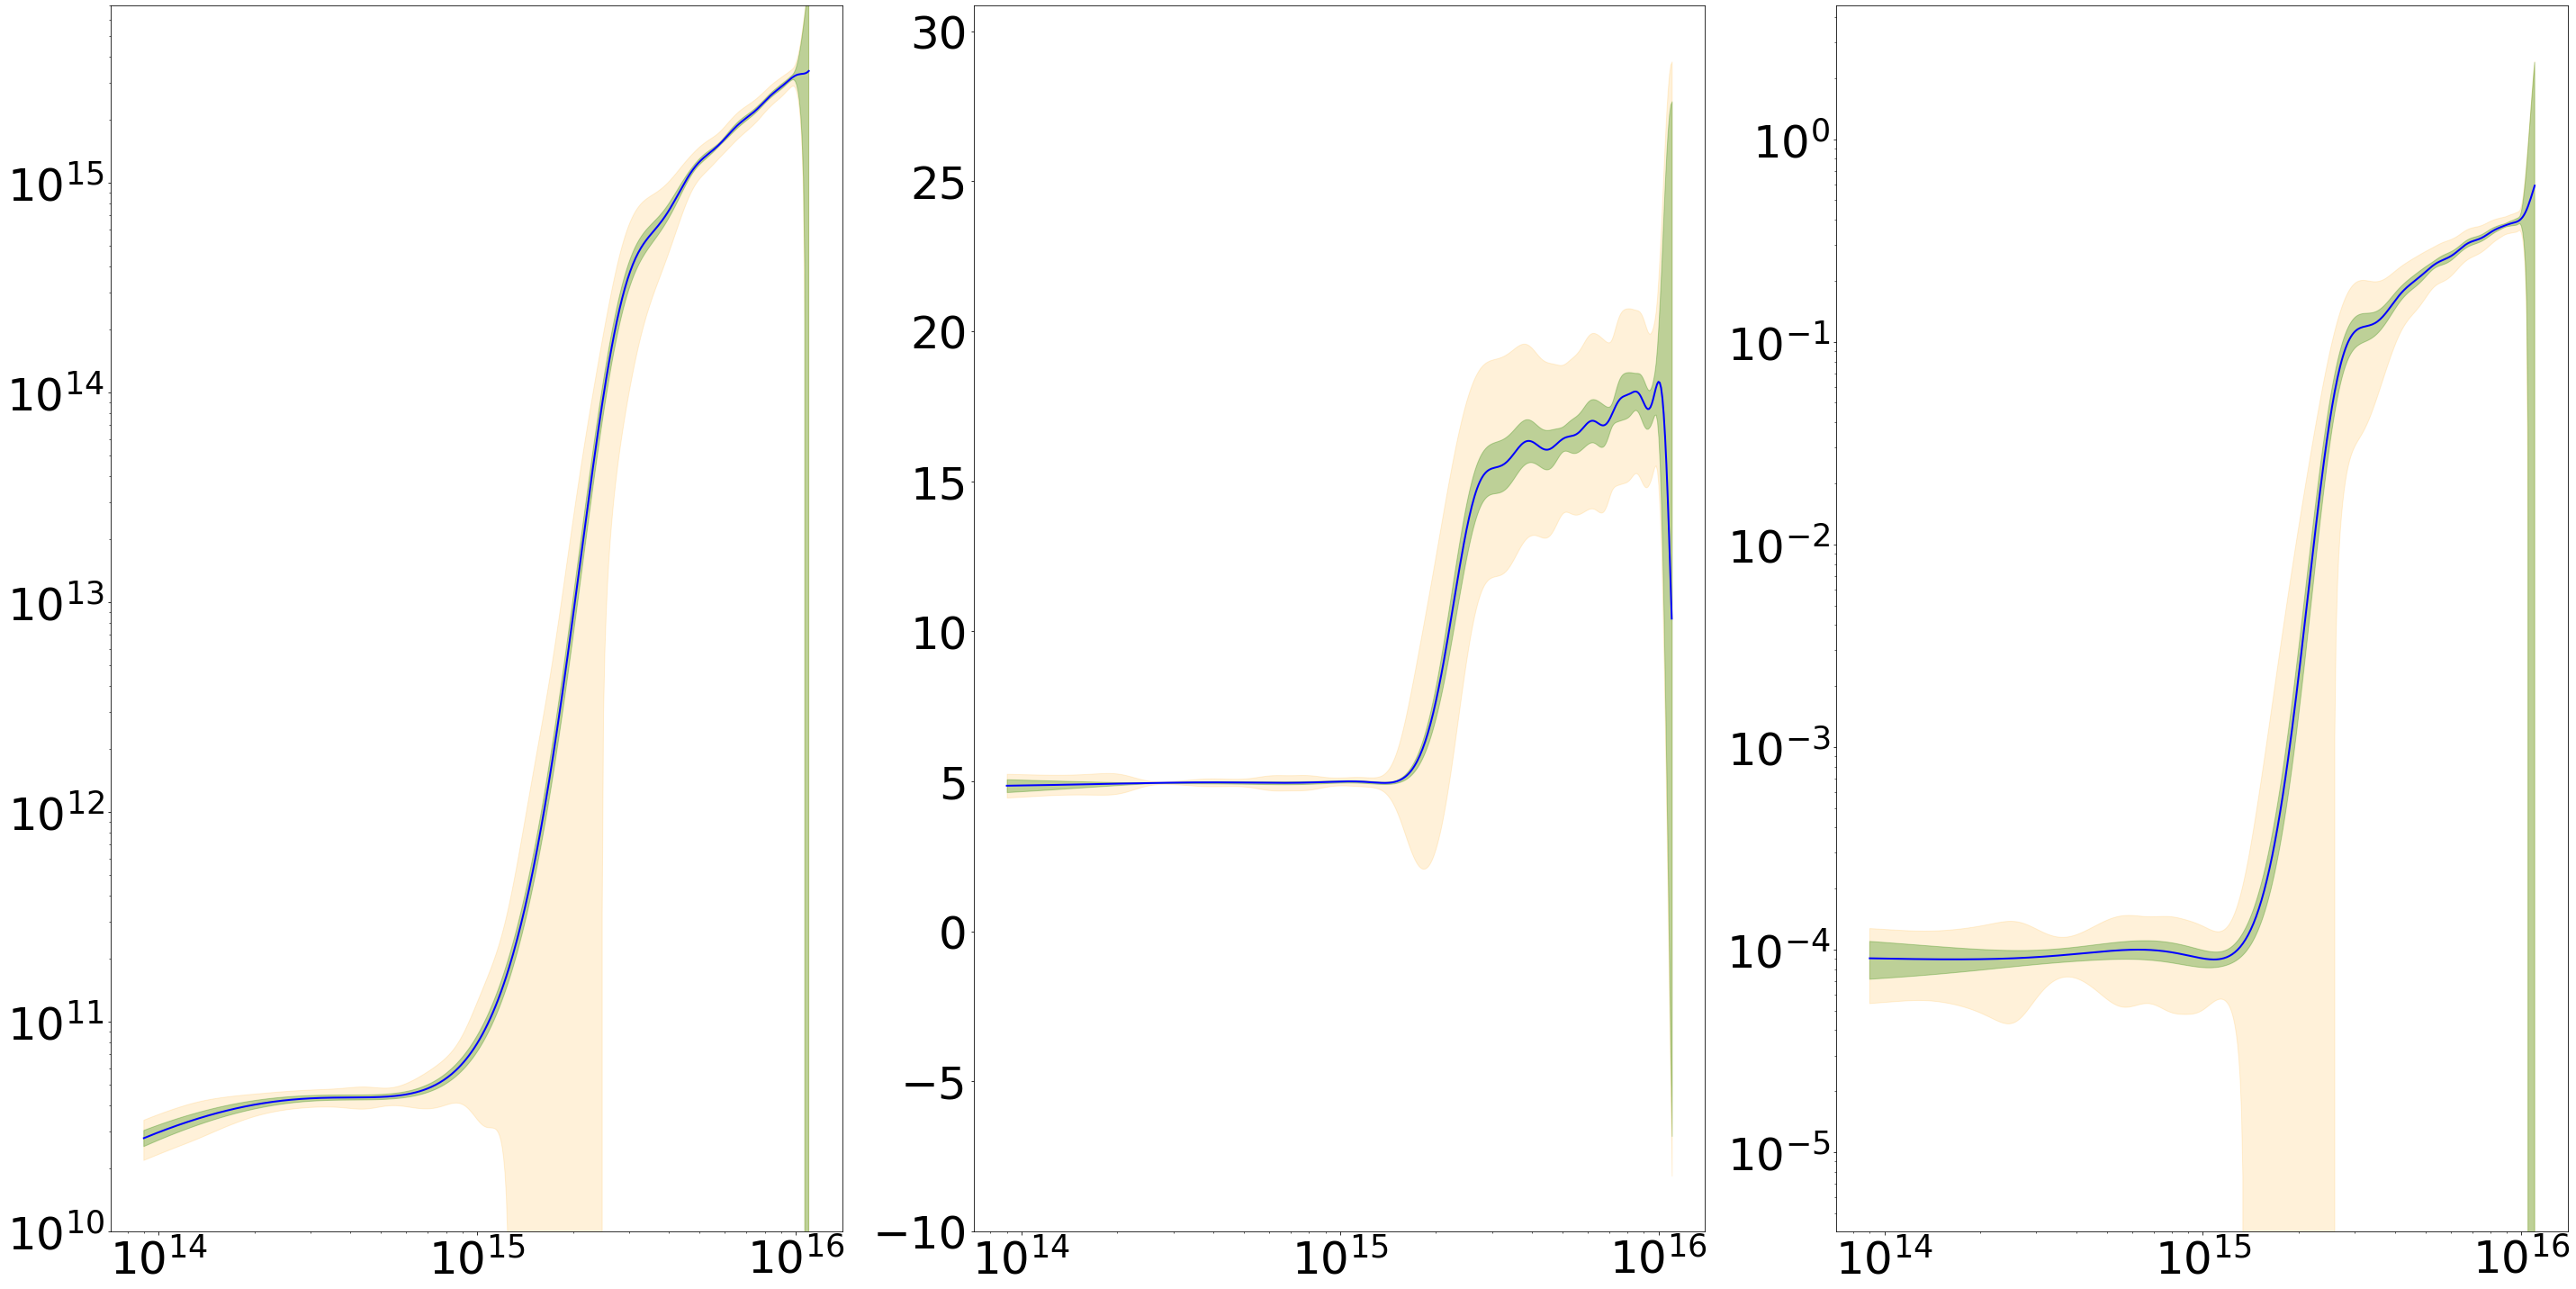

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

if I_srs_plot:
    ax1.loglog(X, P*X, color = 'blue')
    ax1.fill_between(X, (P-P_err_epi)*X, (P+P_err_epi)*X, alpha = 0.3, color = 'green')
    ax1.fill_between(X, (P-P_err)*X, (P+P_err)*X, alpha = 0.15, color = 'orange')
else:
    ax1.loglog(X, P, color = 'blue')
    ax1.fill_between(X, (P-P_err_epi), (P+P_err_epi), alpha = 0.3, color = 'green')
    ax1.fill_between(X, (P-P_err), (P+P_err), alpha = 0.15, color = 'orange')
ax1.set_ylim(1e10, 7e15)
ax2.semilogx(X, T, color = 'blue')
ax2.fill_between(X, (T-T_err_epi), (T+T_err_epi), alpha = 0.3, color = 'green')
ax2.fill_between(X, (T-T_err), (T+T_err), alpha = 0.15, color = 'orange')

ax3.loglog(X, E, color = 'blue')
ax3.fill_between(X, (E-E_err_epi), (E+E_err_epi), alpha = 0.3, color = 'green')
ax3.fill_between(X, (E-E_err), (E+E_err), alpha = 0.15, color = 'orange')

